## Definition of Input Variables

- age - Age of the client- (numeric)

- job - Client’s occupation - (categorical)
(admin, bluecollar, entrepreneur, housemaid, management, retired, selfemployed, services, student, technician, unemployed, unknown)

- marital - Client’s marital status - (categorical)
(divorced, married, single, unknown, note: divorced means divorced or widowed)

- education - Client’s education level - (categorical)
(basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)

- default - Indicates if the client has credit in default - (categorical)
(no, yes, unknown)

- housing - Does the client have a housing loan? - (categorical)
(no, yes, unknown)

- loan - Does the client have a personal loan? - (categorical)
(no, yes, unknown’)

- contact - Type of communication contact - (categorical)
(cellular, telephone)

- month - Month of last contact with client - (categorical)
(January - December)

- day_of_week - Day of last contact with client - (categorical)
(Monday - Friday)

- duration - Duration of last contact with client, in seconds - (numeric)

- campaign - Number of client contacts during this campaign - (numeric)
(includes last contact)

- pdays - Number of days from last contacted from a previous campaign - (numeric)
(999 means client was not previously contacted)

- previous - Number of client contacts performed before this campaign - (numeric)

- poutcome - Previous marketing campaign outcome - (categorical)
(failure, nonexistent , success)

- emp.var.rate - Quarterly employment variation rate - (numeric)

- cons.price.idx - Monthly consumer price index - (numeric)

- cons.conf.idx - Monthly consumer confidence index - (numeric)

- euribor3m - Daily euribor 3 month rate - (numeric)

- nr.employed - Quarterly number of employees - (numeric)

- Output variable (desired target) - Term Deposit - subscription verified
(binary: ‘yes’,‘no’)

##  Imports

In [1]:
#Data Storage and Manipulation Libraries
import pandas as pd
import numpy as np

# !pip3 install sklearn

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from imblearn.over_sampling import SMOTE

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#metrics
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix


#Visualization Libraries
# !pip3 install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Path

In [2]:
path= "/home/nikhil/Downloads/bank-additional/bank-additional/bank-additional-full.csv"

## Read the Data

In [3]:
data= pd.read_csv(path, sep=';')

## EDA

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (41188, 21)


In [6]:
print("Columns of the dataset:", data.columns)

Columns of the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


## Datatypes of all features and target variable

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

## Conclusions from the describe function:
- Most customers in this dataset range from 30-50 years

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Check for null values
- No Null Values 

In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Univariate Analysis

##  Education

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

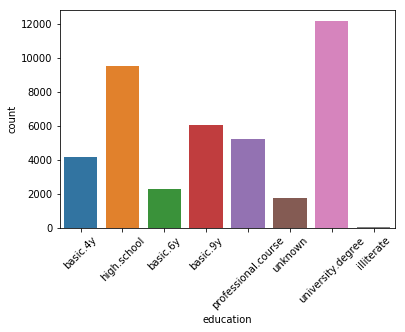

In [10]:
sns.countplot(x='education', data= data)
plt.xticks(rotation=45)

Text(0, 0.5, 'Proportion of Customers')

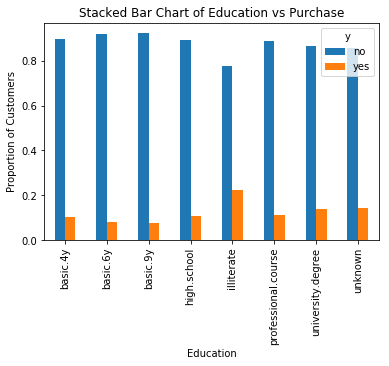

In [11]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

- From this we can infer that Education is an important variable that impacts the target

## Job

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

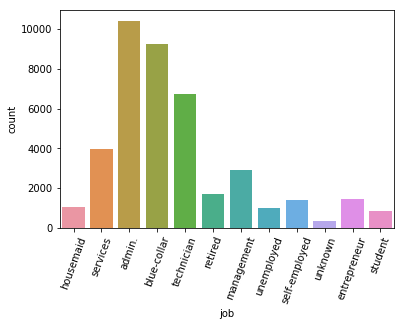

In [12]:
sns.countplot(x='job', data= data)
plt.xticks(rotation=70)

Text(0, 0.5, 'Frequency of Purchase')

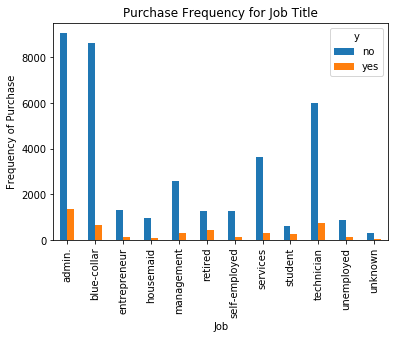

In [13]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

- From this we can infer that Job is an important variable that impacts the target 

## Housing

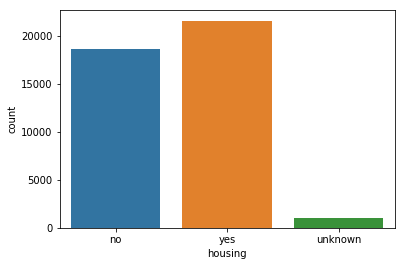

In [14]:
sns.countplot(x='housing', data= data)

Text(0, 0.5, 'Frequency of Purchase')

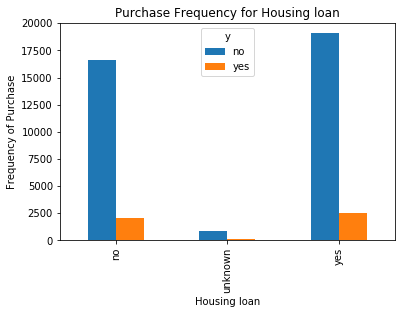

In [15]:
%matplotlib inline
pd.crosstab(data.housing, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Housing loan')
plt.xlabel('Housing loan')
plt.ylabel('Frequency of Purchase')

- From this we can infer that having a housing loan is a good variable that impacts the target(although not very apparent) 

## Default

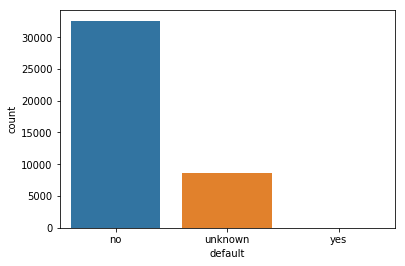

In [16]:
sns.countplot(x='default', data= data)

Text(0, 0.5, 'Frequency of Purchase')

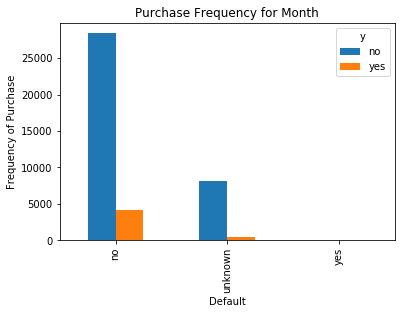

In [17]:
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Default')
plt.ylabel('Frequency of Purchase')

- From this we can infer that Default is an important variable that impacts the target

## Loan

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

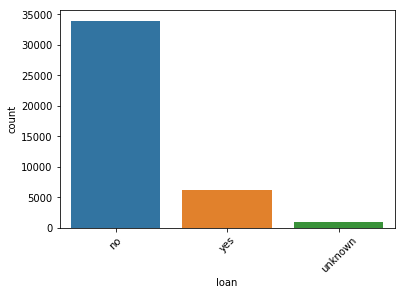

In [18]:
sns.countplot(x='loan', data= data)
plt.xticks(rotation=45)

Text(0, 0.5, 'Frequency of Purchase')

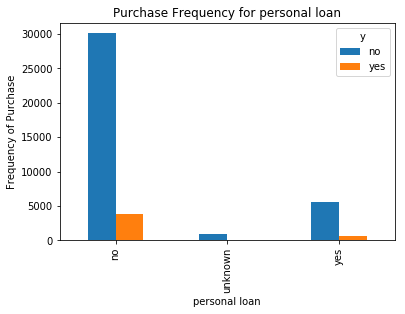

In [19]:
pd.crosstab(data.loan, data.y).plot(kind='bar')
plt.title('Purchase Frequency for personal loan')
plt.xlabel('personal loan')
plt.ylabel('Frequency of Purchase')

- From this we can infer that having a personal loan impacts the target hence an important variable

## Contact

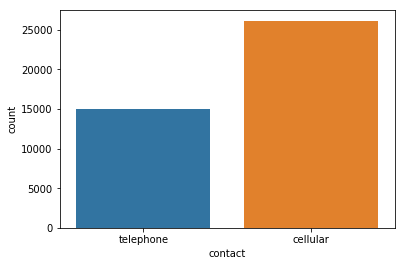

In [20]:
sns.countplot(x='contact', data= data)

Text(0, 0.5, 'Frequency of Purchase')

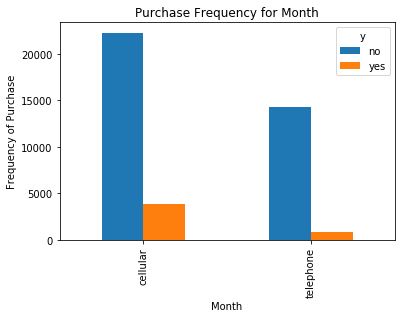

In [21]:
pd.crosstab(data.contact,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

## Month

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

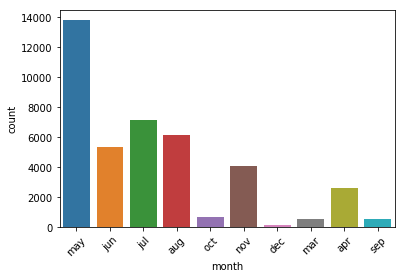

In [22]:
sns.countplot(x='month', data= data)
plt.xticks(rotation=45)

Text(0, 0.5, 'Frequency of Purchase')

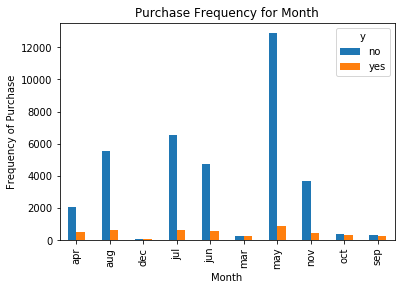

In [23]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

- From this we can infer that month is a good variable that impacts the target 

## Day of the Week

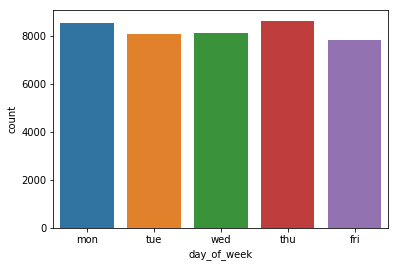

In [24]:
sns.countplot(x='day_of_week', data= data)

Text(0, 0.5, 'Frequency of Purchase')

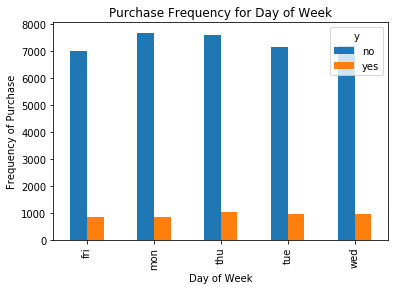

In [25]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

- From this we can infer that day of the week does not impact the target that well hence we can safely remove it

In [26]:
data.drop(labels='day_of_week', inplace=True, axis=1)

## Marital Status

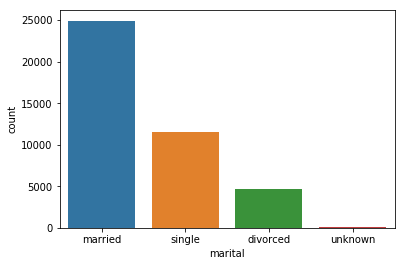

In [27]:
sns.countplot(x='marital', data= data)

Text(0, 0.5, 'Proportion of Customers')

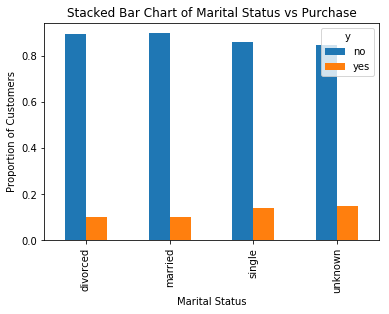

In [28]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

- From this we can infer that marital status does not impact the target that well hence we can remove it (it actually improves the auc by 0.0012 with the advantage of having lesser features) 

In [29]:
data.drop(labels='marital', inplace=True, axis=1)

## Countplot for the target variable
- Shows a huge class imbalance which has to be tackled
- Also shows that we value high recall over high precision for the positive class i.e. we do not want to miss customers who have even slight chances of subscribing to the scheme

(array([0, 1]), <a list of 2 Text xticklabel objects>)

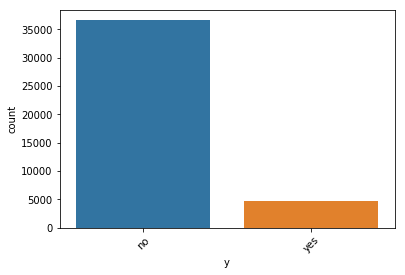

In [30]:
sns.countplot(x='y', data= data)
plt.xticks(rotation=45)

## Histograms for numeric features

## Age

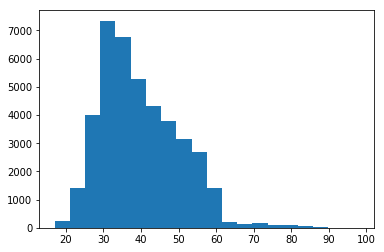

In [31]:
plt.hist(data['age'], bins=20)
plt.show()

## Duration

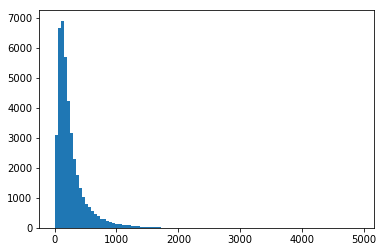

In [32]:
plt.hist(data['duration'], bins=100)
plt.show()

## Conclusions:
- Average age of people who bought the scheme is higher
- pdays(days since cust was last contacted) is lesser for the customeres who bought
- Campaign(no of client contacts during current campaign) is higher for people who did not buy

In [33]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


## Multivariate Analysis

## Find the correlation between numeric features 
- Remove the highly correlated features
- nr.employed, emp.var.rate and euribor3m are highly correlated with each other, hence we will keep only 1 of them
</t> (This is confirmed as we get an increase in auc of about 0.0046)

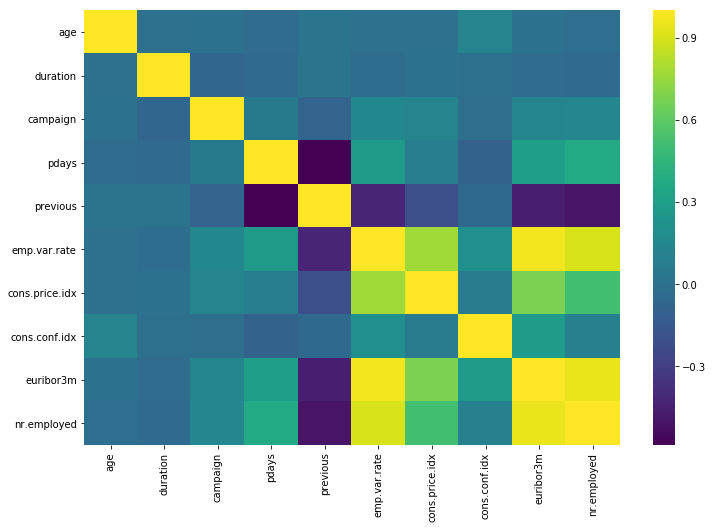

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='viridis')

In [35]:
data.drop(['emp.var.rate', 'nr.employed'], inplace=True, axis=1)

In [36]:
data.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

## Implementing a Baseline model
- NO Outlier removal

- Converting all categorical variables to One-Hot-Encoding with dummy columns 


## Dividing the data into features and target variable

In [37]:
X= data.iloc[:, :-1]
y= data.iloc[:, -1]

## Make a dictionary from the features

In [38]:
# X_dict is a list of dicts where 1 dict= 1 data-point
X_dict = X.to_dict(orient='records')
X_dict[0]

{'age': 56,
 'campaign': 1,
 'cons.conf.idx': -36.4,
 'cons.price.idx': 93.994,
 'contact': 'telephone',
 'default': 'no',
 'duration': 261,
 'education': 'basic.4y',
 'euribor3m': 4.857,
 'housing': 'no',
 'job': 'housemaid',
 'loan': 'no',
 'month': 'may',
 'pdays': 999,
 'poutcome': 'nonexistent',
 'previous': 0}

In [39]:
# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False)

In [40]:
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)
X_encoded

array([[ 56. ,   1. , -36.4, ...,   1. ,   0. ,   0. ],
       [ 57. ,   1. , -36.4, ...,   1. ,   0. ,   0. ],
       [ 37. ,   1. , -36.4, ...,   1. ,   0. ,   0. ],
       ...,
       [ 56. ,   2. , -50.8, ...,   1. ,   0. ,   0. ],
       [ 44. ,   1. , -50.8, ...,   1. ,   0. ,   0. ],
       [ 74. ,   3. , -50.8, ...,   0. ,   0. ,   1. ]])

In [41]:
# Get dummy columns
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

# Converting target column to numeric representation
y= y.map(dict(yes=1, no=0))

In [42]:
y= pd.DataFrame(y)
y.tail()

,y
41183,1
41184,0
41185,0
41186,1
41187,0


In [43]:
print("Shape of X:", X.shape)
X.head()

Shape of X: (41188, 44)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,0,1,0,0,0,1,0


## Dividing the dataset into training and testing data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
columns = X_train.columns

# Handling Class Imbalance

## Using SMOTE to perform oversampling on the minority class

In [46]:
print("Before OverSampling, counts of label '1': {0}".format((y_train == 1).sum()))
print("Before OverSampling, counts of label '0': {} \n".format((y_train == 0).sum()))

sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape))

print("Training Data")
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

X_train_os = pd.DataFrame(data= X_train_sm, columns= columns)
y_train_os = pd.DataFrame(data= y_train_sm, columns=['y'])
X_train_os.head()

Before OverSampling, counts of label '1': y    3721
dtype: int64
Before OverSampling, counts of label '0': y    29229
dtype: int64 



/home/nikhil/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After OverSampling, the shape of X_train: (58458, 44)
After OverSampling, the shape of y_train: (58458,) 

Training Data
After OverSampling, counts of label '1': 29229
After OverSampling, counts of label '0': 29229


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,40.0,501.0,3.0,999.0,0.0,93.075,-47.1,1.405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,33.0,59.0,2.0,999.0,0.0,93.444,-36.1,4.963,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,31.0,292.0,2.0,999.0,1.0,93.369,-34.8,0.655,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.0,76.0,1.0,999.0,0.0,94.465,-41.8,4.947,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29.0,168.0,2.0,999.0,0.0,94.601,-49.5,1.029,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## class imbalance for test data

In [47]:
print("counts of label '1': {0}".format((y_test == 1).sum()))
print("counts of label '0': {} \n".format((y_test == 0).sum()))

counts of label '1': y    919
dtype: int64
counts of label '0': y    7319
dtype: int64 



## Using Logistic regression model as a baseline

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train_os, y_train_os)

/home/nikhil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nikhil/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Testing the trained model 
- Accuracy is a bad metric since we have a class imbalance in the data
- Use ROC_AUC instead 

In [49]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


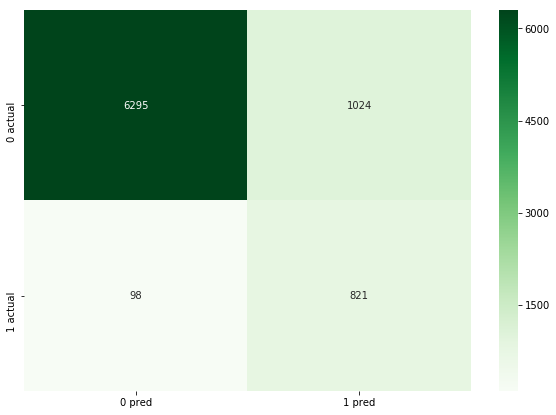

In [50]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap= 'Greens', xticklabels=['0 pred', '1 pred'], yticklabels=['0 actual', '1 actual'])

- In this confusion matrix we have to minimise the '98' as much as possible and maximise the '821'

## Classification Report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.98      0.86      0.92      7319
         yes       0.44      0.89      0.59       919

   micro avg       0.86      0.86      0.86      8238
   macro avg       0.71      0.88      0.76      8238
weighted avg       0.92      0.86      0.88      8238



In [52]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.4f' % auc)
recall= m.recall_score(y_test, y_pred)
print('Recall: %.4f' %recall)

AUC: 0.8767
Recall: 0.8934


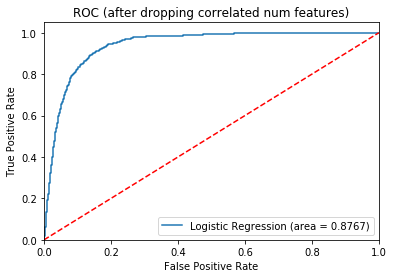

In [53]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (after dropping correlated num features)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Different classifiers

In [54]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),
               'K Nearest Neighbour':KNeighborsClassifier(8),
               'Gaussian Naive Bayes Classifier':GaussianNB(),
                }

log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
log = pd.DataFrame(columns=log_cols)


In [55]:
for name,classify in classifiers.items():
    
    cls = classify
    cls =cls.fit(X_train_os, y_train_os)
    
    y_out = cls.predict(X_test)
    
    accuracy = m.accuracy_score(y_test, y_out)
    precision = m.precision_score(y_test, y_out, average='macro')
    recall = m.recall_score(y_test, y_out, average='macro')
    roc_auc = roc_auc_score(y_test, y_out)
    f1_score = m.f1_score(y_test, y_out, average='macro')
    
    log_entry = pd.DataFrame([[name, accuracy, precision, recall, f1_score, roc_auc]], columns=log_cols)
    log = log.append(log_entry)

/home/nikhil/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nikhil/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nikhil/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nikhil/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/nikhil/.local/li

## Hence we see that Logistic Regression Classifier gives the best result: auc_roc= 0.8767 

                        Classifier  Accuracy  Precision Score  Recall Score  \
0     Gradient Boosting Classifier  0.914542         0.780903      0.821074   
0     Adaptive Boosting Classifier  0.905438         0.761286      0.765996   
0     Linear Discriminant Analysis  0.865137         0.712727      0.861778   
0              Logistic Regression  0.863802         0.714829      0.876726   
0         Random Forest Classifier  0.909201         0.777725      0.724344   
0              K Nearest Neighbour  0.856640         0.697110      0.827975   
0  Gaussian Naive Bayes Classifier  0.864894         0.678190      0.719391   

   F1-Score  roc-auc_Score  
0  0.798990       0.821074  
0  0.763610       0.765996  
0  0.752978       0.861778  
0  0.756120       0.876726  
0  0.747017       0.724344  
0  0.733238       0.827975  
0  0.695173       0.719391  


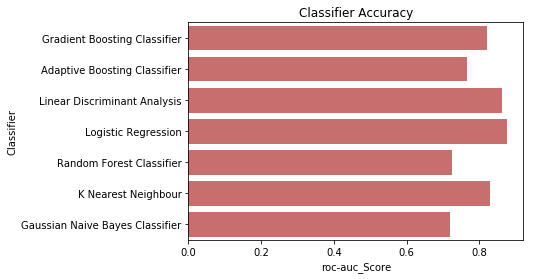

In [56]:
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='roc-auc_Score', y='Classifier', data=log, color="r")  
plt.show()